## t distribution

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-10, 10, 0.01)

In [6]:
# pdf means probability density function
y_df2 = t.pdf(x, 2) # when freedom degree df is 2, calculate the probability of x in t distribution
y_df6 = t.pdf(x, 6)  # when freedom degree df is 6, calculate the probability of x in t distribution
y_df30 = t.pdf(x, 30) # when freedom degree df is 30, calculate the probability of x in t distribution

y_n = norm.pdf(x) # calculate the probability of x in normal distribution

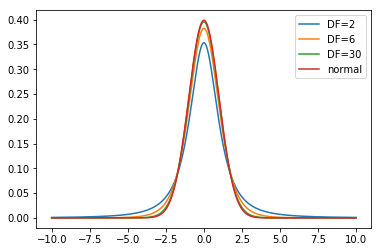

In [7]:
plt.plot(x, y_df2, label="DF=2")
plt.plot(x, y_df6, label="DF=6")
plt.plot(x, y_df30, label="DF=30")
plt.plot(x, y_n, label="normal")

plt.legend()
plt.show()

## Calculate the confidence inference of t distribution

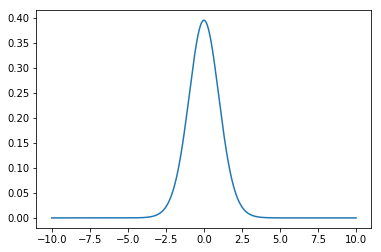

In [18]:
# set freedom degree as 24
df = 24
x = np.arange(-10, 10,0.01)
# get the probability of x in t distribution
y = t.pdf(x, df)

plt.plot(x, y)
plt.show()

confidencial reference: [-2.063899, 2.063899]


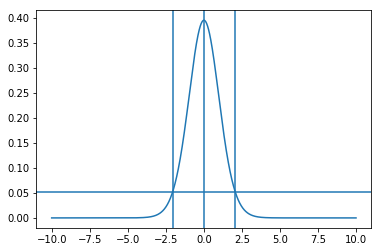

In [21]:
# set confidence level 95%
config = 0.95
# calculate ppf (proportion point function)
left_tail = t.ppf((1-config)/2, df)
right_tail = t.ppf(1-(1-config)/2, df)

plt.plot(x, y)
# add vertical line
plt.axvline(0)
plt.axvline(left_tail)
plt.axvline(right_tail)
# add horizontal line
plt.axhline(t.pdf(left_tail, df))

print("confidencial reference: [%f, %f]" %(left_tail, right_tail))

## Calculate p-value

In [22]:
tValue = 2 # 2 is in the 95% confidencial reference

In [28]:
# Because tValue is in the 95% confidencial reference, the p-value we get should be bigger than 0.05
p = 2*(1-t.cdf(tValue, df))
print(p)

0.056939849936591624


In [31]:
# p-value can also be calculated from another side as below:
a = -tValue
p =2*(t.cdf(a, df))
print(p)

0.056939849936591666


## Project practice:
### The temperature of crab is showed below, the environment temperature is 24.3 degree
### Question: whether the body temperature is significant different from environment temperature
### (because sample size is smaller than 30, we should use t distribution to calculate statistic)

In [32]:
# crab body temperature
data = [
  25.8,24.6,26.1,22.9,25.1,
  27.3,24,  24.5,23.9,26.2,
  24.3,24.6,23.3,25.5,28.1,
  24.8,23.5,26.3,25.4,25.5,
  23.9,27,  24.8,22.9,25.4
]

In [37]:
# calculate data mean
data_mean = np.mean(data)
# calculate data size
data_size = len(data)
# calculate data standard deviation
data_std = np.std(data)
# calculate standard deviation of mean of data
mean_std = data_std/np.sqrt(data_size)
# environment temperature is 24.3
u = 24.3

# calculate t value
tValue = (data_mean - u)/mean_std
print(tValue) # we can guess p-value is smaller than 0.05, because 2.76 is outside of 95% confidencial reference

2.7687085680780887


In [38]:
# calculate p-value of double tail
df = len(data) - 1
p = 2*(1-t.cdf(tValue, df))
print(p)

0.010676172260835948


#### From above results, we can say the body temperature of crab is different from environment temperature

## Independent sample t test
### Project: check the consume between boys and girls is different or not?
#### H0 (null hypothesis): the consume between boys girls is different

In [39]:
import numpy as np
from scipy.stats import t
import pandas as pd

In [40]:
data = pd.read_csv("data5.csv")
data.head(3)

,gender,comsume
0,男生,1970
1,男生,2160
2,男生,1440


In [42]:
# change column name
data['gender'] = data['gender'].replace('男生', 'male')
data['gender'] = data['gender'].replace('女生', 'female')
data.head(3)

,gender,comsume
0,male,1970
1,male,2160
2,male,1440


In [43]:
boy = data[data['gender']=='male']
girl = data[data['gender']=='female']

In [44]:
# calculate freedom degree
boy_df = len(boy)- 1
girl_df = len(girl) -1
df = boy_df + girl_df

In [45]:
# calculate mean
boy_mean = np.mean(boy.comsume)
girl_mean = np.mean(girl.comsume)
# calculate standard deviation of sample
boy_std = np.std(boy.comsume)
girl_std = np.std(girl.comsume)
# calculate the standard deviation of sample mean
boy_s = boy_std/np.sqrt(len(boy))
girl_s = girl_std/np.sqrt(len(girl))
# calculate t value
tValue = (boy_mean - girl_mean)/np.sqrt(boy_s**2 + girl_s**2)
print(tValue)

0.3461137255148371


In [46]:
# calculate p value of double tail
p = 2*(1-t.cdf(tValue, df))
print(p)

0.73060218731246


#### Answer: because p valule is bigger than 0.05, so we cannot refuse H0, so the consume between boys and girls is different

In [47]:
# method 2 to calculate p value
from scipy.stats import ttest_ind
tValue, p = ttest_ind(boy.comsume, girl.comsume)
print(tValue, p)

0.33987693133605207 0.7352676970371221


## Dependent samples t test

### Project: select 14 random fat people, let them drink diet_tea which can help lose weight, record their weight before and after drinking diet tea.
### Question: Is there significant difference before and after drinking diet tea
### H0: There is no difference before and after drinking diet tea

In [48]:
import numpy as np
from scipy.stats import t

In [49]:
# weights (kilogram) before drinking diet tea 
X1 = [90,95,82,91,100,87,91,90,86,87,98,88,82,87]
# weights (kilogram) after drinking diet tea
X2 = [63,71,79,73,74,65,67,73,60,76,71,72,75,62]

In [55]:
X1 = np.array(X1)
X2 = np.array(X2)

In [56]:
x1_mean = np.mean(X1)
x2_mean = np.mean(X2)

In [57]:
N = len(X1)
df = N - 1

In [58]:
X1_X2_sd = np.sqrt((sum((X1-X2)**2)-sum(X1-X2)**2/N)/df)

In [60]:
# calculate t value and p value
tValue = (x1_mean - x2_mean)/(X1_X2_sd/np.sqrt(N))
pValue = 2*(1-t.cdf(tValue, df)) # calculate double tail
print(pValue)

4.0120590272252343e-07


In [61]:
# method 2 to calculate t value and p value
from scipy.stats import ttest_rel
tValue, pValue = ttest_rel(X1, X2)
print(tValue, pValue)

9.327176892657631 4.0120590274463973e-07


### Answer: because p value is smaller than 0.05, so we should refuse the H0, so there is significant difference before and after drinking diet tea